In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

np.random.seed(42)

In [14]:
class Fun:
  def __init__(self) -> None:
        super().__init__()
        self.n = 0

  def __call__(self, x: np.ndarray) -> float:
      self.n += 1
      v = np.sin(0.5*x)
      if v <= 0:
          eps = 0.1
          if 8 - eps <= x[0] and x[0] <= 8 + eps:
              return np.array([1.49])
          return np.array([1.5])
      return v + 1.5

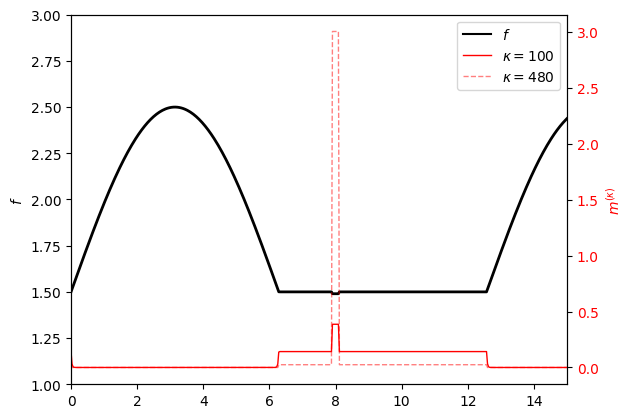

In [28]:
import matplotlib

cmap = matplotlib.colormaps["spring"]

bounds = np.array([(0, 15)])
F = Fun()

x = np.linspace(bounds[0, 0], bounds[0, 1], 500)

fig, ax1 = plt.subplots()

color = "black"
ax1.set_ylabel("$f$", color=color)
ax1.plot(x, [F(np.array([x_i])) for x_i in x], c=(0, 0, 0), linewidth=2.0)

ax2 = ax1.twinx()

""" colors = [(0.92, 0.4, 0.46, 0.3), (0.79, 0.2, 0.22, 0.5), (0.93, 0.22, 0.1, 0.7), (0.51, 0.12, 0.11, 1)]

mean_color = np.zeros(3)
for c in colors:
  mean_color += np.array(c[:-1])
mean_color /= len(colors)
mean_color = tuple(mean_color) """

alphas = [1, 0.5] #np.linspace(0.5, 1, 2)


ax2.set_ylabel("$m^{(\kappa)}$", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.plot([0], [0], label="$f$", c="black")
line_styles = ["-", "--"]
for k, alpha, ls in zip([100, 480], alphas, line_styles):
  integral = quad(lambda x : np.exp(-k*F(np.array([ x ]).reshape(1, -1))), bounds[0, 0], bounds[0, 1])[0]
  m_k = lambda x : np.exp(-k*F(x)) / integral
  c = (1, 0, 0, alpha)
  ax2.plot(x, [m_k(np.array([x_i])) for x_i in x], ls, c=c, label=f"$\kappa = {k}$", linewidth=1)
plt.xlim(bounds[0, 0], bounds[0, 1])
ax1.set_ylim(1, 3)
ax2.legend()

plt.savefig("ex-bad-kappa.pdf", bbox_inches="tight")